In [26]:
import pandas as pd

file_path = r'C:\Users\tiago\OneDrive\Documentos\Classes\Fall 2023\IS733\Week 7\HW2\red_wine.csv'

try:
    # Read the CSV file using pandas
    data = pd.read_csv(file_path)

    # Display the content of the CSV file
    print(data.head())  # You can change the number of rows to display using head() function

except FileNotFoundError:
    print("The file was not found. Please ensure the file path is correct.")
except pd.errors.EmptyDataError:
    print("The file is empty.")
except pd.errors.ParserError:
    print("There was an issue parsing the file. Please ensure it is a valid CSV.")
except pd.errors.DtypeWarning as e:
    print(f"Warning: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


   citric acid  sulphates  alcohol  type
0         0.49       0.63      8.0   low
1         0.66       0.57      8.3   low
2         0.23       0.44      8.5  high
3         0.44       0.84      8.6   low
4         0.08       0.50      8.7   low


In [27]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold



# Assuming the target variable is in a column named 'target' - replace 'target' with your actual target column name
X = data.drop('type', axis=1)  # Features
y = data['type']  # Target variable

# Creating a logistic regression model (you can use a different model)
model = LogisticRegression()

# Perform 10-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Get accuracy scores for each fold
accuracy_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Get AUC scores for each fold
auc_scores = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')

# Display the performance metrics
print(f'Accuracy: {accuracy_scores.mean()}')
print(f'AUC: {auc_scores.mean()}')


Accuracy: 0.7843920145190562
AUC: 0.8758187053885977


In [28]:
import numpy as np

# Assuming 'data' is your dataset and 'target' is your target column
target = data['type']  # Change 'target' to your actual target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('type', axis=1), target, test_size=0.2, random_state=42)

# Calculate Baseline Accuracy (predicting majority class)
baseline_acc = max(y_test.value_counts(normalize=True))
print(f"Baseline Model Accuracy (predicting majority class): {baseline_acc:.4f}")

# Calculate Baseline AUC (random classifier)
random_probs = np.random.rand(len(y_test))  # Generating random probabilities
baseline_auc = roc_auc_score(y_test, random_probs)
print(f"Baseline Model AUC (random classifier): {baseline_auc:.4f}")


Baseline Model Accuracy (predicting majority class): 0.5043
Baseline Model AUC (random classifier): 0.5466


In [29]:

from sklearn.naive_bayes import GaussianNB


model = GaussianNB()

# Perform 10-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Get accuracy scores for each fold
accuracy_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Get AUC scores for each fold
auc_scores = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')

# Display the performance metrics
print(f'Accuracy: {accuracy_scores.mean()}')
print(f'AUC: {auc_scores.mean()}')


Accuracy: 0.8247731397459164
AUC: 0.8932910578071869


In [30]:

from sklearn.tree import DecisionTreeClassifier


# Creating a Decision Tree classifier
model = DecisionTreeClassifier()

# Perform 10-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Get accuracy scores for each fold
accuracy_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Get AUC scores for each fold (Note: Decision Trees can compute AUC directly)
auc_scores = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')

# Display the performance metrics
print(f'Accuracy: {accuracy_scores.mean()}')
print(f'AUC: {auc_scores.mean()}')


Accuracy: 0.8141560798548093
AUC: 0.8057848543332413


In [31]:

from sklearn.svm import SVC


# Creating a Linear SVM classifier
model = SVC(kernel='linear', probability=True)  # Using a linear kernel for SVM

# Perform 10-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Get accuracy scores for each fold
accuracy_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Get AUC scores for each fold
auc_scores = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')

# Display the performance metrics
print(f'Accuracy: {accuracy_scores.mean()}')
print(f'AUC: {auc_scores.mean()}')


Accuracy: 0.79313369630974
AUC: 0.8754455779186963


In [32]:


# Creating an SVM classifier with RBF kernel
model = SVC(kernel='rbf', probability=True)  # Using RBF kernel for SVM

# Perform 10-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Get accuracy scores for each fold
accuracy_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Get AUC scores for each fold
auc_scores = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')

# Display the performance metrics
print(f'Accuracy: {accuracy_scores.mean()}')
print(f'AUC: {auc_scores.mean()}')


Accuracy: 0.5358439201451906
AUC: 0.8550237416904084


In [33]:

from sklearn.ensemble import RandomForestClassifier


# Creating a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Using 100 trees in the forest

# Perform 10-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Get accuracy scores for each fold
accuracy_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Get AUC scores for each fold
auc_scores = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')

# Display the performance metrics
print(f'Accuracy: {accuracy_scores.mean()}')
print(f'AUC: {auc_scores.mean()}')


Accuracy: 0.8403811252268604
AUC: 0.918030971418068


Accuracy: 0.8403811252268604
AUC: 0.918030971418068


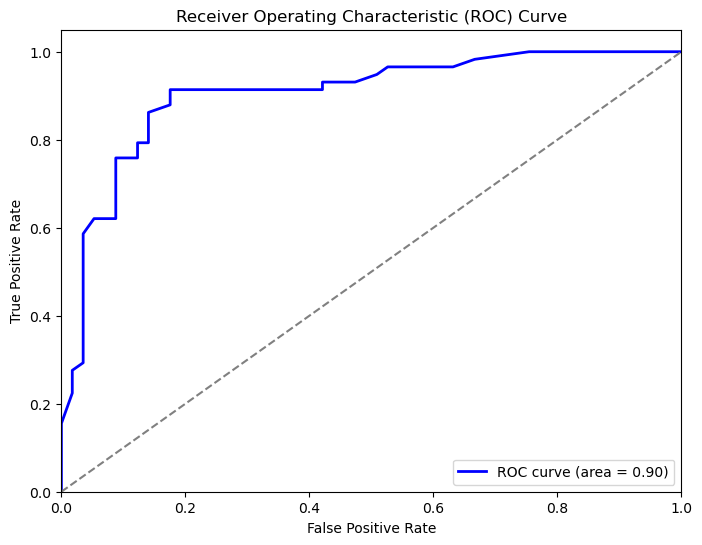

In [34]:


# Read the CSV file using pandas
file_path = r'C:\Users\tiago\OneDrive\Documentos\Classes\Fall 2023\IS733\Week 7\HW2\red_wine.csv'
data = pd.read_csv(file_path)

# Mapping 'high' to 1 and 'low' to 0 in the target column
data['type'] = data['type'].map({'low': 0, 'high': 1})

# Assuming the target variable is now numerical (0 and 1)
X = data.drop('type', axis=1)  # Features
y = data['type']  # Target variable

# Creating a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Using 100 trees in the forest

# Perform 10-fold cross-validation to get performance metrics
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Get accuracy scores for each fold
accuracy_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# Get AUC scores for each fold
auc_scores = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')

# Display the performance metrics
print(f'Accuracy: {accuracy_scores.mean()}')
print(f'AUC: {auc_scores.mean()}')

# Split the data into training and testing sets for ROC curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [36]:


# Load the dataset
file_path = r'C:\Users\tiago\OneDrive\Documentos\Classes\Fall 2023\IS733\Week 7\HW2\white_wine.csv'
data = pd.read_csv(file_path)

# Assuming 'target' is the target column in your dataset
# Replace 'target' with your actual target column name
X = data.drop('type', axis=1)  # Features
y = data['type']  # Target variable

# Create a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Using 100 trees in the forest

# Perform 10-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Get AUC scores for each fold
auc_scores = cross_val_score(model, X, y, cv=kfold, scoring='roc_auc')

# Display the mean AUC
mean_auc = auc_scores.mean()
print(f"Mean AUC with 10-fold cross-validation: {mean_auc:.4f}")

# Comment on performance based on the AUC score
if mean_auc == 0.5:
    print("The model's performance is similar to random guessing (no predictive power).")
elif mean_auc < 0.7:
    print("The model's performance is fair, but it may need improvement.")
elif mean_auc < 0.8:
    print("The model's performance is good and shows promising predictive power.")
else:
    print("The model's performance is strong, indicating high predictive power.")


Mean AUC with 10-fold cross-validation: 0.9958
The model's performance is strong, indicating high predictive power.
